In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
diabetes_df = pd.read_csv('dataset/diabetes_data.csv')
diabetes_df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


# Exploratory Data Analysis

In [3]:
diabetes_df['Diagnosis'].value_counts()

Diagnosis
0    1127
1     752
Name: count, dtype: int64

In [4]:
diabetes_df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


<Axes: xlabel='FastingBloodSugar', ylabel='HbA1c'>

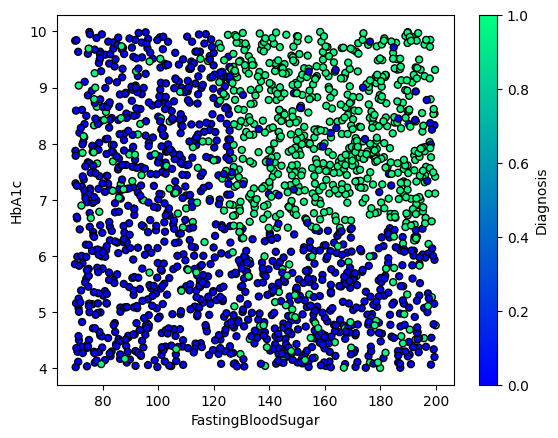

In [5]:
# Plot the data on a scatter plot
diabetes_df.plot.scatter(
    x='FastingBloodSugar', 
    y='HbA1c', 
    c='Diagnosis', 
    marker='o', 
    s=25, 
    edgecolor='k',
    colormap="winter"
)

# Define Features and Target

In [6]:
# Define the features set and drop the target column, along with confidiential columns
X = diabetes_df.copy()
X.drop(["Diagnosis", "DoctorInCharge", "PatientID"], axis=1, inplace=True)
X.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940


In [7]:
# Define the target set
y = diabetes_df["Diagnosis"].values.reshape(-1, 1)
y[:5]   

array([[1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

# Train, Test, Split and Scaling

In [8]:
# Split the data into training and testing sets. 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Scale the X data by using the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.55697086, -0.97521207, -0.7154509 , ..., -0.76515288,
        -1.61717243,  0.1757702 ],
       [-1.02449537,  1.02541799, -0.7154509 , ..., -1.36639243,
         0.81059924, -0.3177147 ],
       [ 1.68628896, -0.97521207, -0.7154509 , ...,  0.66743858,
         0.83204518,  0.21116582],
       ...,
       [ 1.39584779,  1.02541799,  0.25546544, ..., -1.04806618,
         1.19607867, -0.03707305],
       [-1.31493654,  1.02541799,  0.25546544, ...,  0.669703  ,
         0.56656746,  1.01757424],
       [ 1.00859288, -0.97521207,  0.25546544, ..., -1.11861737,
         0.72141491, -1.05050301]])

In [10]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.08886248,  1.02541799, -0.7154509 , ..., -0.49920065,
         1.61533689,  1.39642556],
       [ 0.13726935, -0.97521207, -0.7154509 , ..., -0.8745932 ,
        -0.47568676, -0.47921708],
       [ 1.6378821 ,  1.02541799, -0.7154509 , ..., -1.26280357,
         0.43740768, -1.67362152],
       ...,
       [ 1.2506272 ,  1.02541799,  2.19729812, ...,  0.38712483,
        -0.11116004, -1.26604004],
       [-1.46015713,  1.02541799,  2.19729812, ..., -1.21562494,
         1.69787023, -0.15514535],
       [ 1.44425465,  1.02541799, -0.7154509 , ..., -1.60150535,
        -1.49267376,  0.68960406]])

# Create the model

In [11]:
# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the data
logistic_regression_model.fit(X_train_scaled, y_train)

c:\Users\lucas\anaconda3\envs\activities\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8463878326996198
Testing Data Score: 0.8351063829787234


In [13]:
# Find R2 Score
print(f"R2 Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

R2 Score: 0.8351063829787234


# Predictions of Diagnosis

In [15]:
# Generate Predictions from the model
predictions = logistic_regression_model.predict(X_test_scaled)

# Ensure y_test is 1-dimensional
y_test_flattened = y_test.flatten()

# Create Dataframe with predictions and actual values
results_df = pd.DataFrame({"Predictions": predictions, "Actual": y_test_flattened})


In [16]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Ensure y_test is 1-dimensional
y_test_flattened = y_test.flatten()

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Real Values": y_test_flattened})

In [18]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Real Values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
559,1,1
560,0,0
561,1,0
562,0,0


In [19]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test_flattened, testing_predictions)

0.8351063829787234

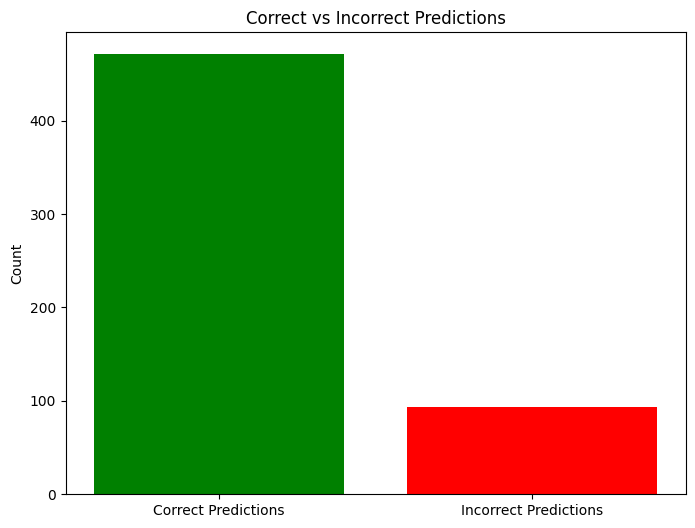

Correct Counts: 471
Incorrect Counts: 93
Percentage of Incorrect Predictions: 16.49%
Percentage of Correct Predictions: 83.51%


In [20]:
correct = (testing_predictions == y_test_flattened)
incorrect = ~correct

correct_counts = correct.sum()
incorrect_counts = incorrect.sum()

plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_counts, incorrect_counts], color=['green', 'red'])
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()
print(f"Correct Counts: {correct_counts}")
print(f"Incorrect Counts: {incorrect_counts}")
print(f"Percentage of Incorrect Predictions: {100 * (incorrect_counts / len(testing_predictions)):.2f}%")
print(f"Percentage of Correct Predictions: {100 * (correct_counts / len(testing_predictions)):.2f}%")

# Compute Correlation Coefficients

In [21]:
# Because X_train_scaled is a numpy array and X contains the original feature names
# Recreate the DataFrame with scaled features for easier correlation analysis
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [22]:
# Add the target column back to the DataFrame
X_train_scaled_df['Diagnosis'] = y_train

In [23]:
# Compute the correlation matrix. The .corr() method calculates the Pearson correlation coefficient between the features and the target variable.
corr_matrix = X_train_scaled_df.corr()

In [24]:
# Extract the correlation of each feature with the target variable 'Diagnosis'
target_corr = corr_matrix['Diagnosis'].drop('Diagnosis')

In [25]:
# Display the correlations
print("Correlation of features with the target 'Diagnosis':")
print(target_corr)

Correlation of features with the target 'Diagnosis':
Age                             -0.031089
Gender                           0.034727
Ethnicity                       -0.033414
SocioeconomicStatus              0.018291
EducationLevel                  -0.013558
BMI                              0.008295
Smoking                          0.070874
AlcoholConsumption               0.004565
PhysicalActivity                 0.008873
DietQuality                     -0.064458
SleepQuality                     0.006869
FamilyHistoryDiabetes            0.061093
GestationalDiabetes             -0.004712
PolycysticOvarySyndrome          0.031666
PreviousPreDiabetes             -0.035571
Hypertension                     0.116471
SystolicBP                      -0.043904
DiastolicBP                      0.049199
FastingBloodSugar                0.473494
HbA1c                            0.423868
SerumCreatinine                  0.008760
BUNLevels                        0.025174
CholesterolTotal       

C:\Users\lucas\AppData\Local\Temp\ipykernel_13944\2037348255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')


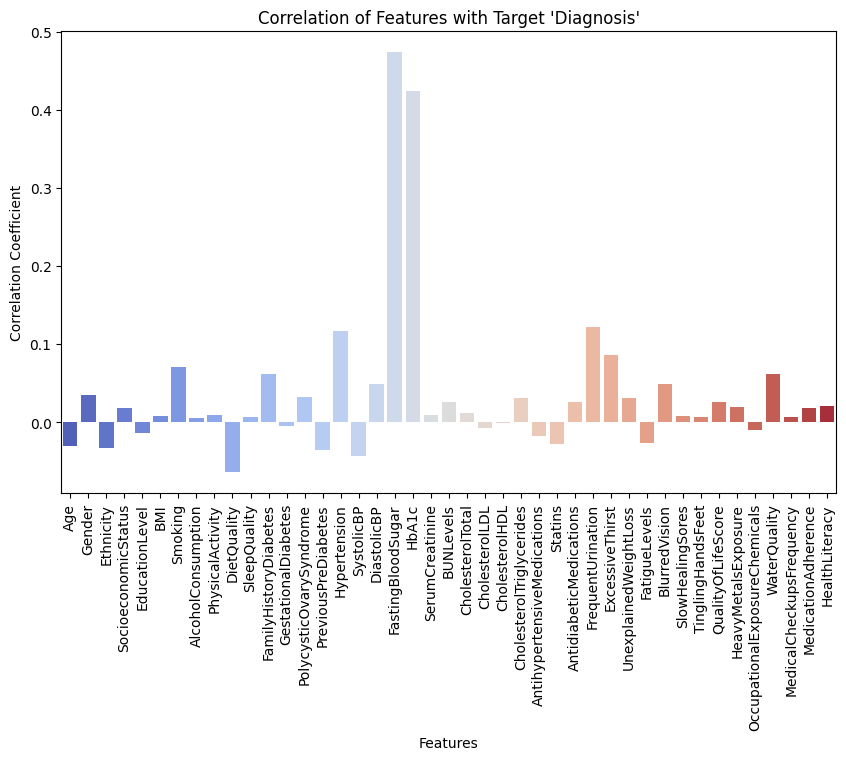

In [26]:
# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target 'Diagnosis'")
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Confusion Matrix

C:\Users\lucas\AppData\Local\Temp\ipykernel_13944\817982907.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Negative', 'Positive'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_13944\817982907.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Negative', 'Positive'])


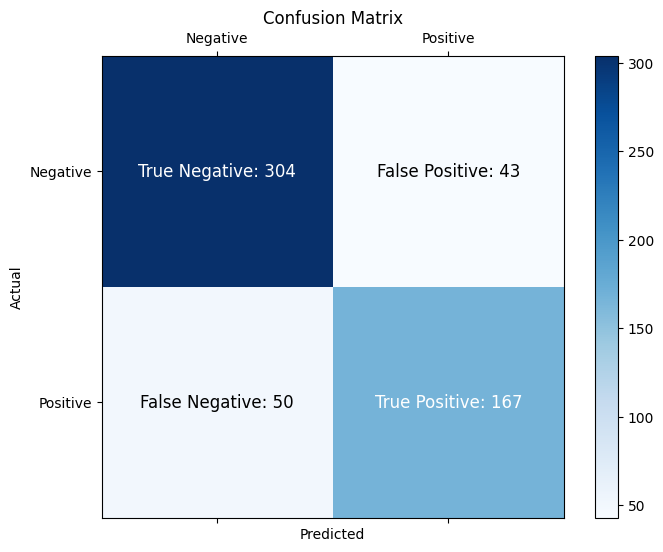

In [27]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, logistic_regression_model.predict(X_test_scaled))

# Plot the confusion matrix manually
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Adding text annotations for TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

ax.text(0, 0, f'True Negative: {tn}', ha='center', va='center', color='white', fontsize=12)
ax.text(1, 0, f'False Positive: {fp}', ha='center', va='center', color='black', fontsize=12)
ax.text(0, 1, f'False Negative: {fn}', ha='center', va='center', color='black', fontsize=12)
ax.text(1, 1, f'True Positive: {tp}', ha='center', va='center', color='white', fontsize=12)

# Set x and y axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set tick labels
ax.set_xticklabels(['', 'Negative', 'Positive'])
ax.set_yticklabels(['', 'Negative', 'Positive'])

# Title for the plot
plt.title('Confusion Matrix')
plt.show()

# Precision & Recall

In [28]:
# Calculate the precision and recall of the model

precision = tp / (tp + fp)

print(f"Precision: {precision}")

recall = tp / (tp + fn)

print(f"Recall: {recall}")

Precision: 0.7952380952380952
Recall: 0.7695852534562212


# ROC Curve

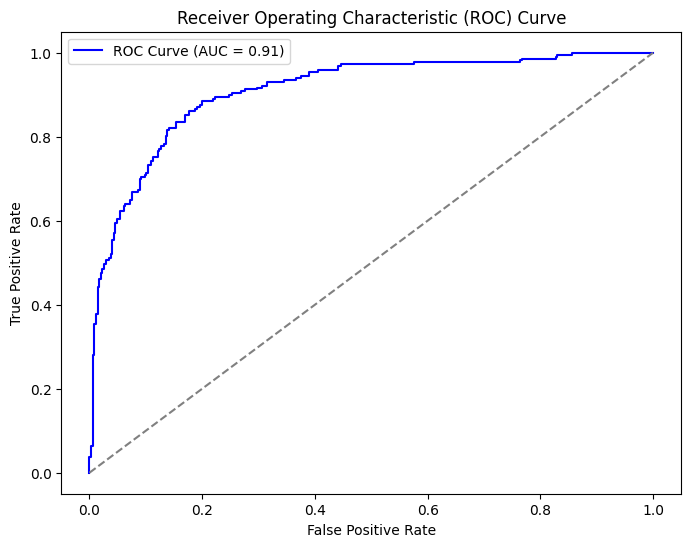

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_flattened, y_prob)
auc_score = roc_auc_score(y_test_flattened, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Interpretation

- The ROC Curve being in the upper half, especially close to the top left corner, indicates that the model is performing well.
- The model has high sensitivity (True Positive Rate, TPR) with a low False Positive Rate.
- This means that the model is correctly identifying a large proportion of the actual positive cases (high TPR) while misclassifying very few of the negative cases as positive (low FPR).
- A perfect classifier would have a curve that goes straight up to TPR = 1.
- A model that performs no better than random guessing would produce a diagonal line from the bottom left to the top right corner.

### AUC (Area Under Curve)

- AUC is calculated on a scale from 0 to 1.
- AUC = 1: A Perfect Classifier
- AUC = 0.5: No better than random guessing (the diagonal line in the ROC Plot)
- AUC < 0.5: Worse than random guessing (the model is inverted in it's predictions)

### The ROC Curve in Practice

- Threshold Selection: By analyzing the ROC Curve you can determine a threshold value that is balanced between True Positives and False Positives based on your specific needs. If you want to reduce False Positives you could select a threshold where the FPR is still low and the TPR is relatively high (close to the top left corner).
- Comparing Models: THe ROC curve is useful for comparing models. A model with a higher AUC curve is generally better at classifying positive and negative classes.


# Precision Recall Curve

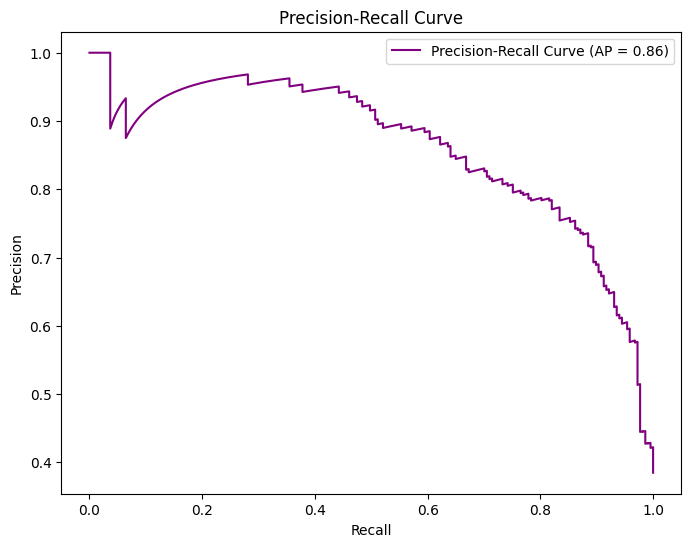

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_flattened, y_prob)
avg_precision = average_precision_score(y_test_flattened, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Interpretation
- Precision answers the question, "Of all the positive predictions, how many were actually correct?" High precision indicates a low false positive rate.
- Recall answers the question, "Of all the actual positives, how many did the model correctly identify?" High recall indicates a low false negative rate.
- A good model should have a Precision-Recal curve that bows upward toward the top-right corner. This shows the model has both high precision and high recall.
### Trade-off between Precision and Recall
- High Recall, Low Precision: As you increase recall, the model is more sensitive and identifies more true positives, but it might also increase the number of false positives, thereby reducing precision.
- High Precision, Low Recall: If you focus on improving precision, the model makes fewer false positive errors, but it might miss some true positives, reducing recall.